# Load data

Mount the google drive unit where the images to be processed shoud be loaded



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

List contents of a shared google drive folder:

In [ ]:
folder1 = drive.CreateFile({'id':'17gurZ_3TSmhBpEXQyW54J1nlbxktgG0s'})
# Auto-iterate through all files in the root folder.
file_list = drive.ListFile({'q': "'17gurZ_3TSmhBpEXQyW54J1nlbxktgG0s' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: raw_25000_rf_or, id: 15zAarVYWT0AE9Rb3NmicmggPfHAsxKZ3
title: raw_25000_rf_or_PNGS, id: 1Gg2JmxrV02aek8Te8D4lOw_V8WCw_h79
title: raw_25000_rf_or.hdr, id: 1PnyIh-ukQOIcM5_2rBpamNHVFEFHzK2G


Identify the file you want to read:

In [ ]:
file_to_read = file_list[1]

In [ ]:
file_to_read[]

'https://drive.google.com/embeddedfolderview?id=1Gg2JmxrV02aek8Te8D4lOw_V8WCw_h79'

In [ ]:
hdr_path = file_to_read['embedLink']

Read the images using gdal libraries

In [ ]:
from osgeo import gdal
import sys
import numpy as np

#hdr_path = '/content/drive/MyDrive/DEEP FOREST ZUMAIN/afectada/raw_25000_rf_or'
#hdr_path = '/content/drive/MyDrive/DEEP FOREST ZUMAIN/sana/raw_2352_rf_or'
img = gdal.Open(hdr_path) # This is an example, please use the real extension of the image file instead of '.tif'

In [ ]:
print('Number of channels: {}'.format(img.RasterCount))
print(' Size of images is {} x {}'.format(img.GetRasterBand(1).ReadAsArray().shape[0],img.GetRasterBand(1).ReadAsArray().shape[1]))

AttributeError: ignored

In [ ]:
img.GetProjection()

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]]'

Create a volume with all the images from the frequency channels (bands) and save the image of each band in a separate folder:

In [ ]:
import matplotlib.pyplot as plt
import skimage as sk
from skimage import io
from os import mkdir
import os.path
from os import path

# Crear la carpeta para poner los PNGs:
if os.path.exists(hdr_path+'_PNGS/')==False:
    mkdir(hdr_path+'_PNGS/')

# Generar el volumen, crear figura y grabar el png: 
VOL = np.zeros((img.GetRasterBand(1).ReadAsArray().shape[0],img.GetRasterBand(1).ReadAsArray().shape[1],img.RasterCount))
for band in range(img.RasterCount):
    band += 1
    print("[ GETTING BAND ]: ", band)
    srcband = img.GetRasterBand(band)
    inputArray = np.array(img.GetRasterBand(band).ReadAsArray()) 
    VOL[:,:,band-1] = inputArray
    fig = plt.figure(figsize=(10,10))
    io.imshow(inputArray,cmap='gray')
    plt.savefig(hdr_path+'_PNGS/img_ch'+str(band)+'.png')
    plt.close()

[ GETTING BAND ]:  1


/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


[ GETTING BAND ]:  2
[ GETTING BAND ]:  3
[ GETTING BAND ]:  4
[ GETTING BAND ]:  5
[ GETTING BAND ]:  6
[ GETTING BAND ]:  7
[ GETTING BAND ]:  8
[ GETTING BAND ]:  9
[ GETTING BAND ]:  10
[ GETTING BAND ]:  11
[ GETTING BAND ]:  12
[ GETTING BAND ]:  13
[ GETTING BAND ]:  14
[ GETTING BAND ]:  15
[ GETTING BAND ]:  16
[ GETTING BAND ]:  17
[ GETTING BAND ]:  18
[ GETTING BAND ]:  19
[ GETTING BAND ]:  20
[ GETTING BAND ]:  21
[ GETTING BAND ]:  22
[ GETTING BAND ]:  23
[ GETTING BAND ]:  24
[ GETTING BAND ]:  25
[ GETTING BAND ]:  26
[ GETTING BAND ]:  27
[ GETTING BAND ]:  28
[ GETTING BAND ]:  29
[ GETTING BAND ]:  30
[ GETTING BAND ]:  31
[ GETTING BAND ]:  32
[ GETTING BAND ]:  33
[ GETTING BAND ]:  34
[ GETTING BAND ]:  35
[ GETTING BAND ]:  36
[ GETTING BAND ]:  37
[ GETTING BAND ]:  38
[ GETTING BAND ]:  39
[ GETTING BAND ]:  40
[ GETTING BAND ]:  41
[ GETTING BAND ]:  42
[ GETTING BAND ]:  43
[ GETTING BAND ]:  44
[ GETTING BAND ]:  45
[ GETTING BAND ]:  46
[ GETTING BAND ]: 

# Visualize images:

Generate a figure with a sample of the bands to visualize the patterns:

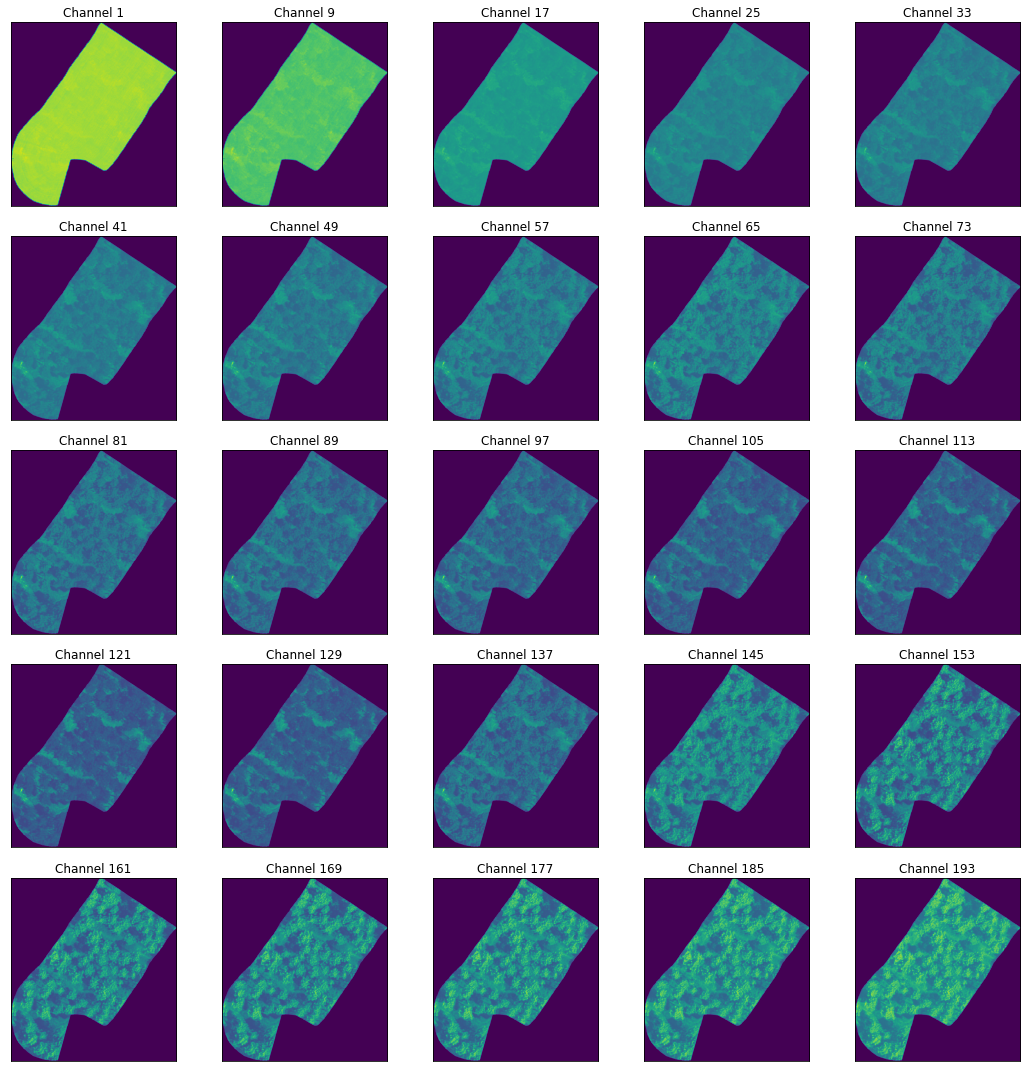

In [ ]:
channels = np.arange(1,272,8)

fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(15, 15),subplot_kw={'xticks': [], 'yticks': []})

for ax, channel in zip(axs.flat, channels):
    ax.imshow(VOL[:,:,channel], cmap='viridis')
    ax.set_title('Channel {}'.format(channel))
plt.tight_layout()
plt.show()

Acceso a valores de píxel y canal

Pixel 10,13 del canal 9:

In [ ]:
VOL[9,12,9]

0.0

Rango:

In [ ]:
VOL[:,:,1].min()

0.0

In [ ]:
VOL[:,:,1].max()

0.0033185118809342384

In [ ]:
from skimage.util import img_as_ubyte

I1 = VOL[:,:,1]

# representar i9ntensidades con valores entre 0-255:
I1uint8 = img_as_ubyte(I1)

I1uint8.min()


0

In [ ]:
I1uint8.max()


1

Visualize image:

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


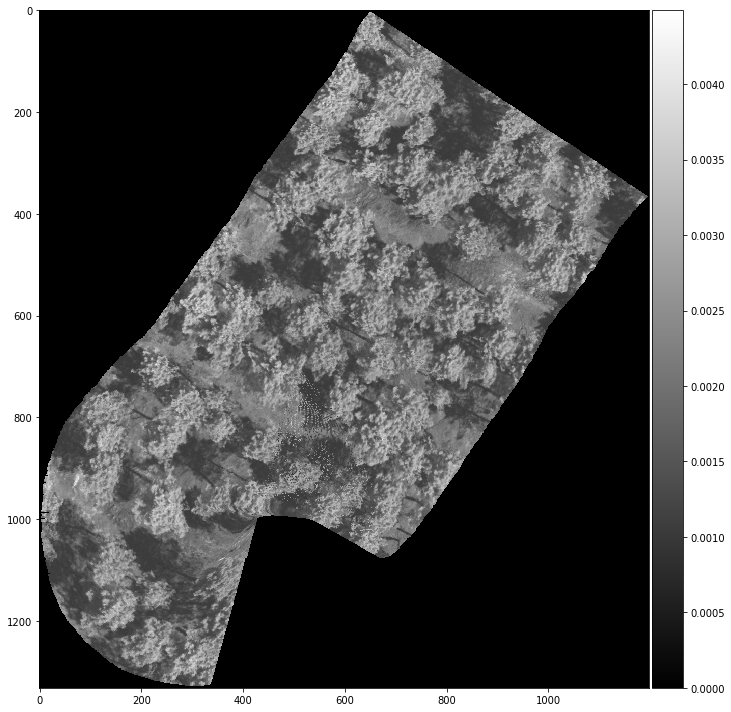

In [ ]:
I1 = VOL[:,:,150]

fig = plt.figure(figsize=(10,10))
io.imshow(I1,cmap='gray')
plt.show()

Histograma de la imagen de un canal

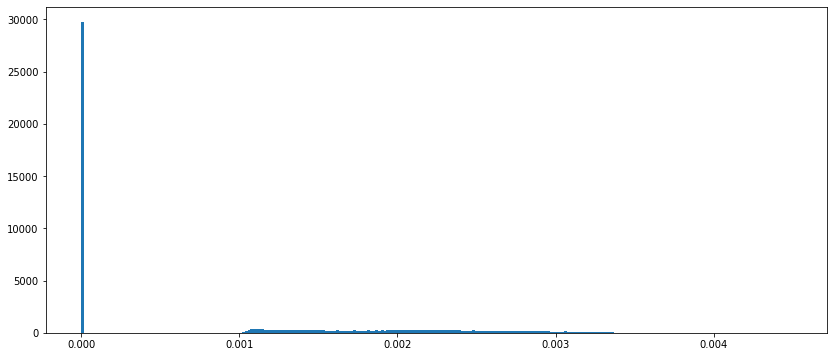

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# reshape training image as 1d array:
v_I = I1.reshape(I1.shape[0]*I1.shape[1],1)

fig = plt.figure(figsize=(14, 6))
plt.hist(v_I,bins=256,density=True)
plt.show()

Segmentar estructuras con algoritmo k-means (clustering)

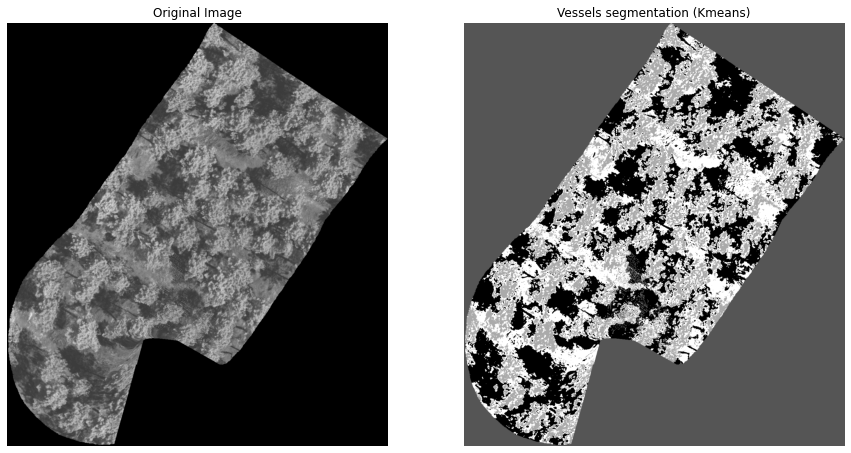

In [ ]:
from sklearn.cluster import KMeans

# Fit a Kmeans clustering model with two clusters using training image:
kmeans = KMeans(n_clusters=4, random_state=0).fit(v_I)

# Apply to predict test image:

v_kmeans = kmeans.predict(v_I)
I_kmeans = np.array(v_kmeans).reshape(I1.shape[0],I1.shape[1]).astype(np.uint8)# Shape back result as image 


fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(I1, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_kmeans, cmap=plt.cm.gray)
ax2.set_title('Vessels segmentation (Kmeans)')
ax2.set_axis_off()

plt.show()

In [ ]:
kmeans.cluster_centers_

array([[ 1.34999890e-03],
       [-1.11658729e-14],
       [ 2.84946866e-03],
       [ 2.10506011e-03]])

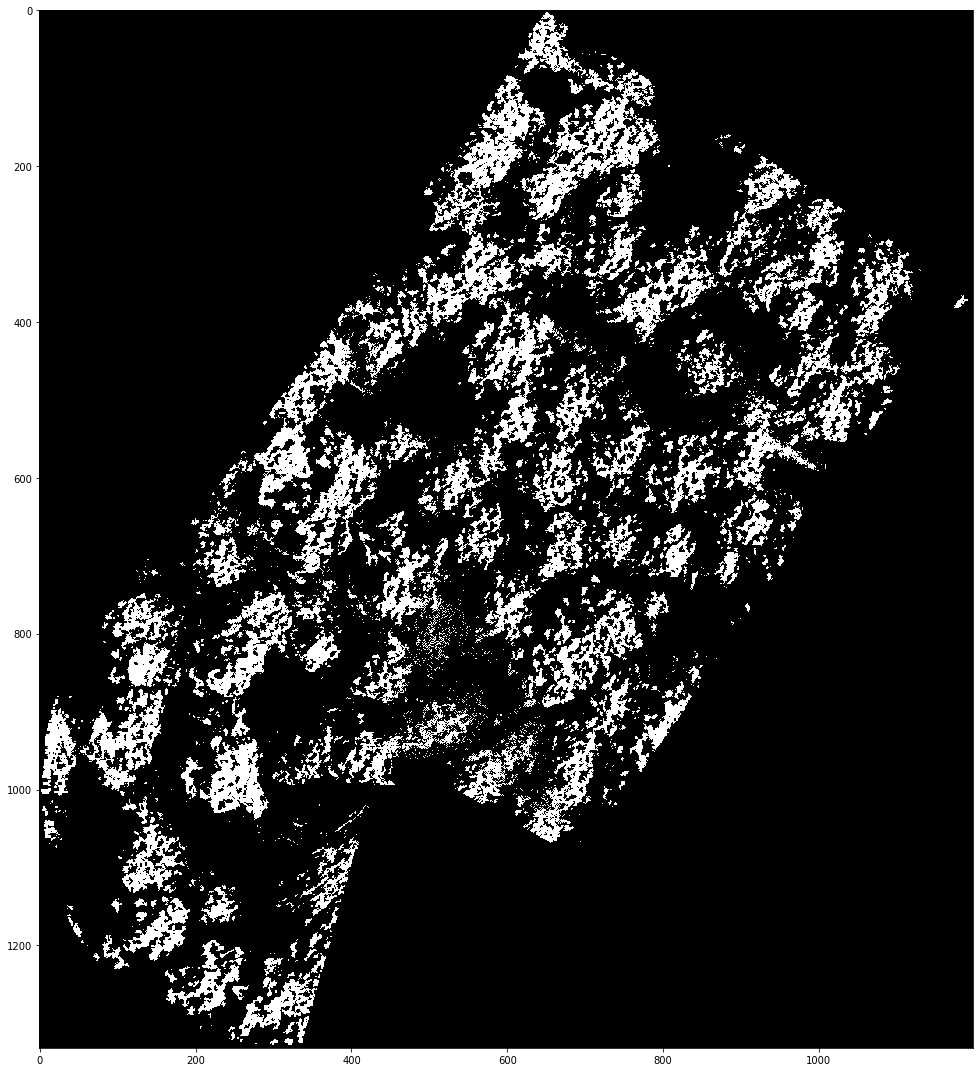

In [ ]:
Icopas = I_kmeans==2

fig = plt.figure(figsize=(15,15))
io.imshow(Icopas,cmap='gray')
plt.show()

Evolución pixel en diferentes bandas de frecuencia:

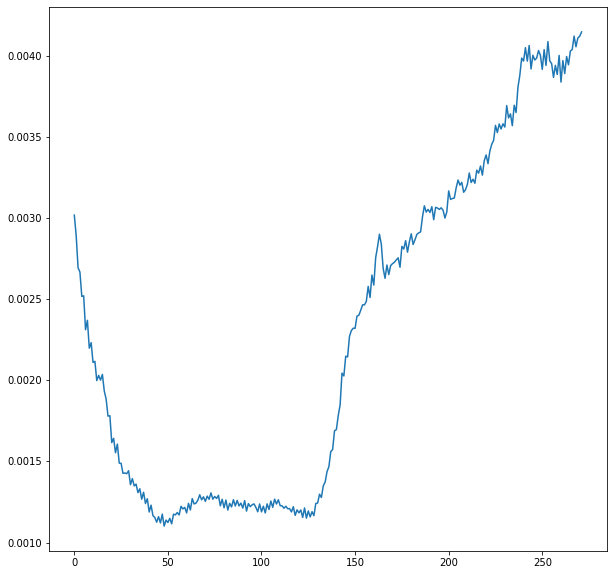

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.plot(VOL[700,500,:])
plt.show()

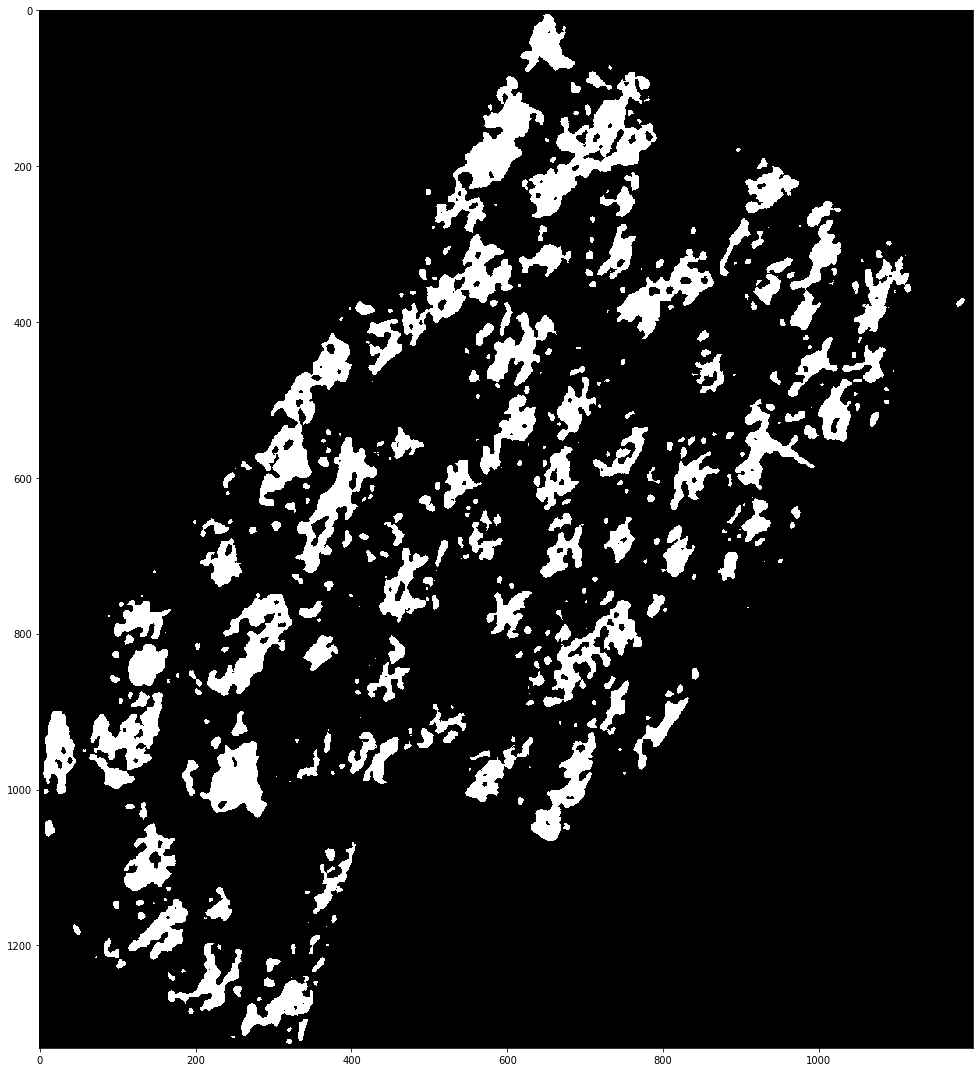

In [ ]:
from skimage.morphology import disk
from skimage.filters import median

Icopas2 = median(Icopas,disk(5))
fig = plt.figure(figsize=(15,15))
io.imshow(Icopas2,cmap='gray')
plt.show()

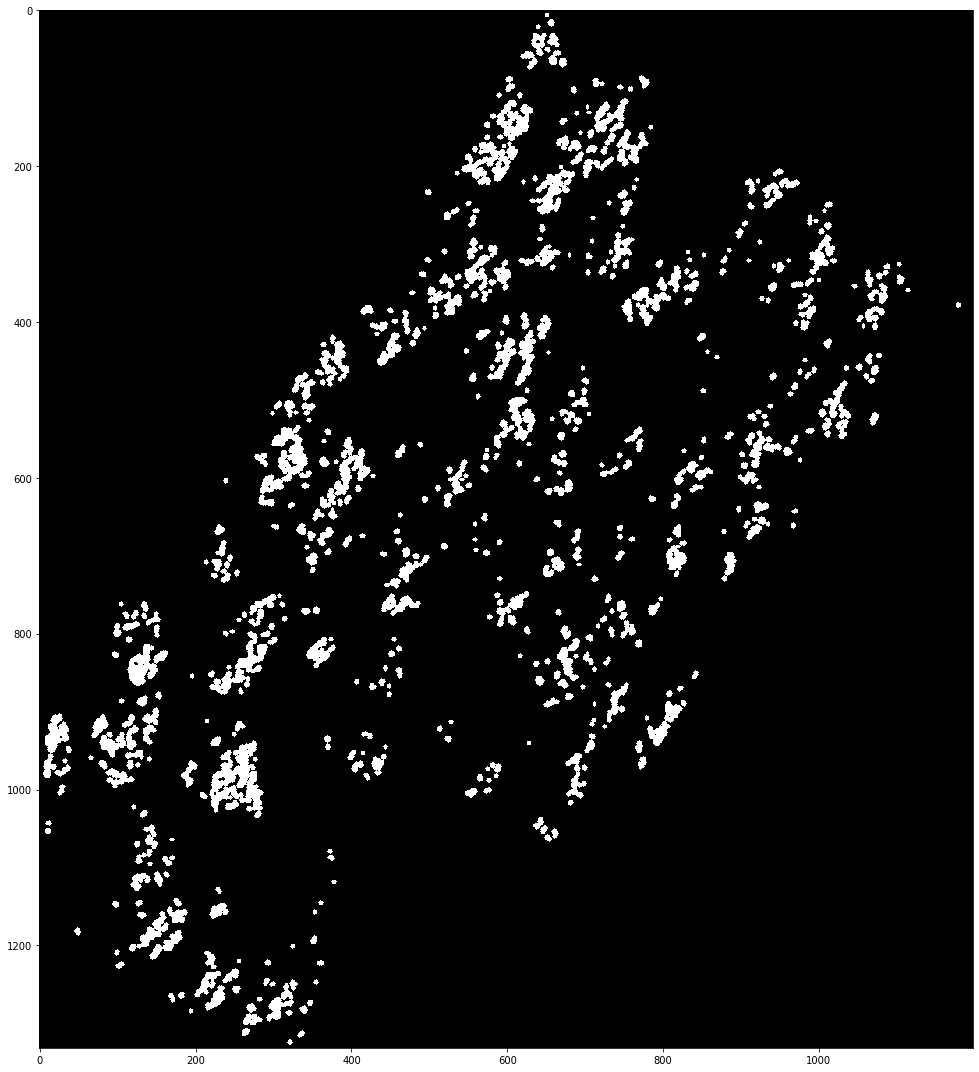

In [ ]:
from skimage import morphology


Icopas1 = morphology.binary_opening(Icopas,morphology.disk(3))
fig = plt.figure(figsize=(15,15))
io.imshow(Icopas1,cmap='gray')
plt.show()


In [ ]:
indsuelo = np.where(I1==0)
indfondo = np.where(I1==1)
indcopa = np.where(I1==2)
indsobmra = np.where(I1==3)

In [ ]:
indsuelo

(array([   0,    0,    0, ..., 1331, 1331, 1331]),
 array([   0,    1,    2, ..., 1195, 1196, 1197]))